# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [8]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [183]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [47]:
# Your code here:
sensor = sensor.dropna()

How many rows and columns are in our data?

In [48]:
# Your code here:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [130]:
# Your code here:
dates = pd.date_range(start='1/1/2018  00:00:00', end='1/1/2018 00:29:10', periods = sensor.shape[0])

In [182]:
pd.DatetimeIndex(dates, freq='infer');

Assign the time series index to the dataframe's index.

In [131]:
# Your code here:
sensor.index = dates

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [132]:
# Your code here:
import statsmodels.api as sm

Figure(432x288)


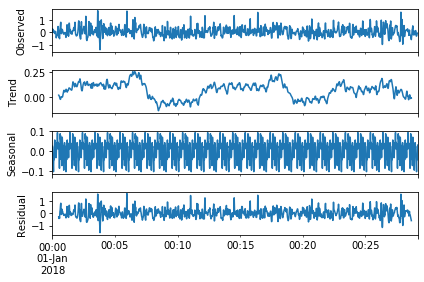

In [134]:
res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)
print(res.plot())

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

Figure(432x288)


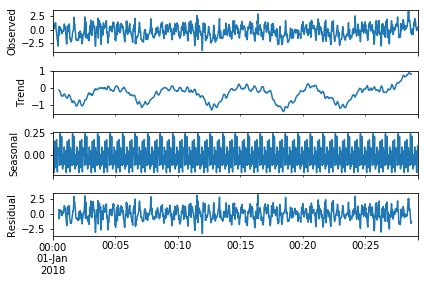

In [133]:
res = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)
print(res.plot())

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

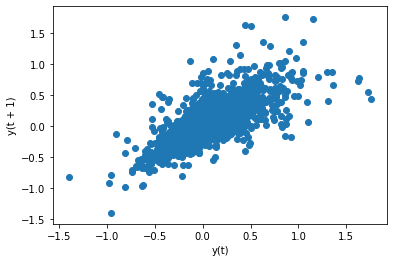

In [137]:
# Your code here:
pd.plotting.lag_plot(sensor["userAcceleration.x"]);

Create a lag plot for `rotationRate.x`

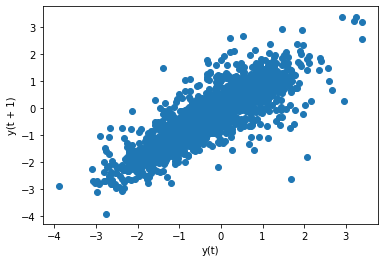

In [138]:
# Your code here:
pd.plotting.lag_plot(sensor["rotationRate.x"]);

What are your conclusions from both visualizations?

In [139]:
# Your conclusions here:
# That both have a correlation with their past values. Points are usually higher than their 
# previous point. 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [147]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

accel_stat = stationaryCheck(sensor['userAcceleration.x'])
rotat_stat = stationaryCheck(sensor['rotationRate.x'])

print(f'User acceleration is {accel_stat} and rotation acceleration is {rotat_stat}')

User acceleration is Stationary and rotation acceleration is Stationary


What are your conclusions from this test?

In [13]:
# Your conclusions here:
# That observations are not dependant on time


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

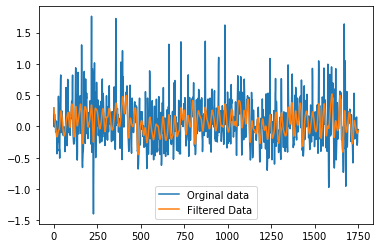

In [160]:
from scipy import signal
import matplotlib.pyplot as plt
data = sensor['userAcceleration.x']

b, a = signal.butter(3, 1/10)
data_filtered = signal.filtfilt(b, a, data)

plt.plot(data.to_numpy())
plt.plot(data_filtered)
plt.legend(["Orginal data","Filtered Data"]);

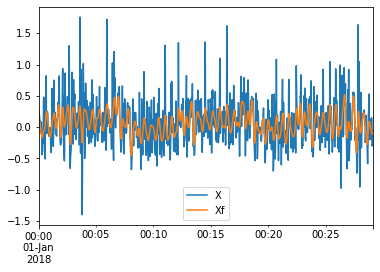

In [165]:
df = pd.DataFrame({
    "X":data.to_numpy(),
    "Xf": data_filtered
},index=pd.date_range(start='1/1/2018  00:00:00', end='1/1/2018 00:29:10', periods = sensor.shape[0]))
df.plot();

In [181]:
# Your code here:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA

predictions = dict()
for col in df.columns:
    train = df[col]
    test = df[col][:10]
    model = AR(train)
    model_fit = model.fit(maxlag=10)
    predictions[col] = model_fit.predict(start=len(train),
                                    end=len(train)+len(test)-1, dynamic=False)
pred = pd.DataFrame(predictions)
pred

/Users/luciasuelves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)
/Users/luciasuelves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


,X,Xf
2018-01-01 00:29:11,-0.023061,-0.053543
2018-01-01 00:29:12,0.032348,-0.039118
2018-01-01 00:29:13,0.065467,-0.026331
2018-01-01 00:29:14,0.078879,-0.016009
2018-01-01 00:29:15,0.080169,-0.008668
2018-01-01 00:29:16,0.080635,-0.004478
2018-01-01 00:29:17,0.076233,-0.003252
2018-01-01 00:29:18,0.069257,-0.004465
2018-01-01 00:29:19,0.062616,-0.007298
2018-01-01 00:29:20,0.059512,-0.010726


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [175]:
# Your code here:
from sklearn.metrics import mean_squared_error

x_mse = mean_squared_error(test, pred['X'])
x_rmse = np.sqrt(x_mse)

xf_mse = mean_squared_error(test, pred['Xf'])
xf_rmse = np.sqrt(xf_mse)

print(f'The rmse error for user Acceleration is {x_rmse} The rmse error for user Acceleration and filtered data is {xf_rmse}')

The rmse error for user Acceleration is 0.14122748104872032 The rmse error for user Acceleration and filtered data is 0.19398505198682184


In [ ]:
# So this time, the predictions work better with the non filtered data